In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [160]:
root = 'AFAD-Full'
files = open(f'{root}/AFAD-Full.txt', 'r').read().split('\n')[:-1]

total_files = list()
age_list = list()
gender_list = list()
for file in files:
    age = int(file.split('/')[1])
    gender = int(file.split('/')[2])
    if age <= 40:
        age_list.append(int(age))
        gender_list.append(int(gender))
        total_files.append(file)
        
total_files = pd.Series(total_files)
np.random.seed(1)
np.random.shuffle(total_files)

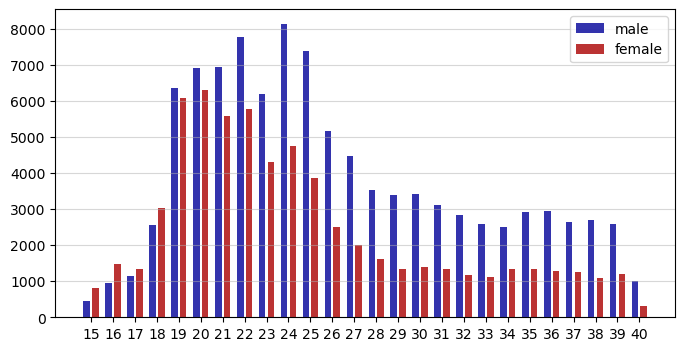

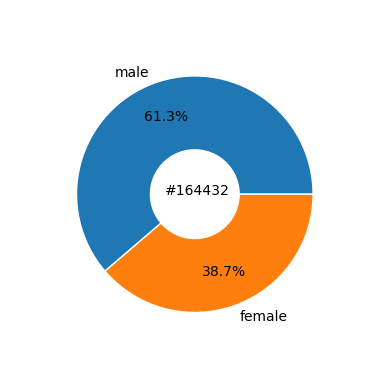

In [161]:
index = np.array([i for i in range(15, 41)])
male_age_count = [0] * 41
female_age_count = [0] * 41
for age, gender in zip(age_list, gender_list):
    if gender == 111:
        male_age_count[age] += 1
    else:
        female_age_count[age] += 1
    
plt.figure(figsize=(8, 4))
plt.grid(axis='y', alpha=0.5)
plt.bar(x=index-0.2, 
        height=male_age_count[15:41],
        width=0.3,
        color='#000099',
        alpha=0.8,
        label='male')
plt.bar(x=index+0.2, 
        height=female_age_count[15:41],
        width=0.3,
        color='#AA0000',
        alpha=0.8,
        label='female')
plt.xticks(index)
plt.legend()

plt.figure()
plt.pie([sum(male_age_count), sum(female_age_count)],
        labels = ['male', 'female'],
        autopct = "%1.1f%%",
        pctdistance = 0.7,
        radius=0.8,
        wedgeprops=dict(width=0.5, edgecolor='w')
       )
plt.text(-0.2, 0, f'#{len(total_files)}')

plt.show()

In [162]:
train_files = total_files[:int(len(total_files) * 0.8)]
val_files = total_files[int(len(total_files) * 0.8):]

df = list()
for file in train_files:
    file_name = file.split('/')[-1]
    
    if('jpg' not in file_name):
        continue
    
    file_path = file.replace('./', '')
    age = int(file.split('/')[1])
    gender = {111: 'male', 112:'female'}[int(file.split('/')[2])]
    df.append([file_name, file_path, age, gender])
df = pd.DataFrame(df)
df.columns = ['file', 'path', 'age', 'gender']
df = df.sort_values(by=['age', 'path'])
df.to_csv(f'{root}/train.csv', index=False)

df = list()
for file in val_files:
    file_name = file.split('/')[-1]
    
    if('jpg' not in file_name):
        continue
    
    file_path = file.replace('./', '')
    age = int(file.split('/')[1])
    gender = {111: 0, 112:1}[int(file.split('/')[2])]
    df.append([file_name, file_path, age, gender])
df = pd.DataFrame(df)
df.columns = ['file', 'path', 'age', 'gender']
df = df.sort_values(by=['age', 'path'])
df.to_csv(f'{root}/val.csv', index=False)